In [1]:
# Using Framingham
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
# import seaborn as sns
%matplotlib inline

In [2]:
np.version.version

'1.16.4'

In [3]:
df = pd.read_csv(r'C:\Users\us61565\Desktop\Explainability\Framingham\framingham.csv')

In [4]:
# strange column, dropping
df.drop('education', axis = 1, inplace = True)
# filling out NaNs with mean
df.iloc[:,2:] = df.iloc[:,2:].fillna(df.iloc[:,2:].mean())

In [5]:
features = df.iloc[:,:-1]
result = df.iloc[:,-1]

In [6]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, result, test_size = 0.2, random_state = 14)

In [8]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import graphviz

In [ ]:
data_dmatrix = xgb.DMatrix(data=X_train_std,label=y_train)

In [33]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.08,
                max_depth = 7, alpha = 10, n_estimators = 10)

In [34]:
xg_reg.fit(X_train_std,y_train)
prediction_y_5 = xg_reg.predict(X_test_std)

[15:23:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
rmse = np.sqrt(mean_squared_error(y_test, prediction_y_5))
print("RMSE: %f" % (rmse))

RMSE: 0.379098


In [36]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[15:23:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:23:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:23:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [37]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [54]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(xg_reg)
shap_values = explainer.shap_values(X_train_std)

In [55]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [56]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

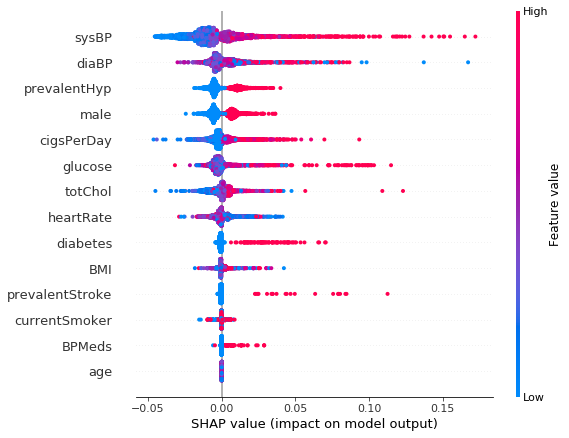

In [57]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

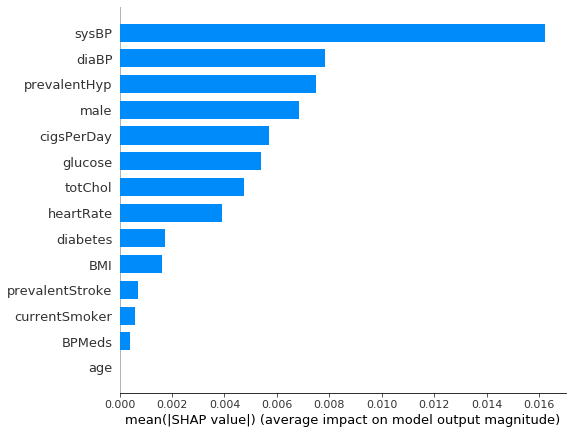

In [58]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

## With Dean's data

In [59]:
df_tr = pd.read_excel(r'C:\Users\us61565\Desktop\Explainability\Sample Logistic Regression_V0.xlsx', sheet_name = 'Train Data')
df_test = pd.read_excel(r'C:\Users\us61565\Desktop\Explainability\Sample Logistic Regression_V0.xlsx', sheet_name = 'Unused Sample')

In [60]:
df_tr.head()

,Dep,a3,b1,b2,f1,f2,g1,m2,m3,m4,...,a4,c1,s4,t1,m1,h1,h2,a2,a1,r2
0,1,12.0,2.0,11.0,1.0,0.0,2.0,0.0,0.0,7.0,...,246943.0,7030.0,1,4,0,655434,0,-2.795463,0.002591,0.003253
1,0,0.0,0.0,9.0,0.0,0.0,4.0,0.0,0.0,0.0,...,1496.0,1496.0,1,1,0,432000,0,-2.605681,0.004585,0.002096
2,1,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,...,67003.0,339.0,1,0,0,69551,0,-2.751968,0.002962,0.005580
3,1,7.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,...,29367.0,6664.0,1,0,0,28367,0,-1.914656,0.027768,0.017117
4,1,5.0,0.0,6.0,0.0,0.0,5.0,0.0,0.0,0.0,...,48903.0,0.0,0,0,0,64136,0,-2.523279,0.005813,0.003826


In [61]:
features_dean = df_tr.iloc[:,1:]
result_dean = df_tr.iloc[:,0]

In [62]:
X_train_dean, X_test_dean, y_train_dean, y_test_dean = train_test_split(features_dean, result_dean, test_size = 0.2, random_state = 14)

In [63]:
scaler = StandardScaler()
X_train_std_dean = scaler.fit_transform(X_train_dean)
X_test_std_dean = scaler.fit_transform(X_test_dean)

In [ ]:
data_dmatrix_dean = xgb.DMatrix(data=X_train_std_dean,label=y_train_dean)

In [ ]:
xg_reg_dean = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.08,
                max_depth = 9, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg_dean.fit(X_train_std_dean,y_train_dean)
prediction_y_6 = xg_reg_dean.predict(X_test_std_dean)

In [71]:
rmse = np.sqrt(mean_squared_error(y_test_dean, prediction_y_6))
print("RMSE: %f" % (rmse))

RMSE: 0.314234


In [72]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results_dean = xgb.cv(dtrain=data_dmatrix_dean, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[15:29:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:29:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer_dean = shap.TreeExplainer(xg_reg_dean)
shap_values_dean = explainer.shap_values(X_train_std_dean)